# Module 4 Peer Review

**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random

import datetime
from datetime import datetime, timedelta, date

#import os
#import zipfile
import scipy
from scipy import stats

# import scipy.cluster.hierarchy as sch
# from scipy.cluster.hierarchy import dendrogram, linkage

import statsmodels as st
from statsmodels.multivariate.pca import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from collections import Counter

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set(style='darkgrid', font_scale=1.2)
plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.cluster import AgglomerativeClustering, DBSCAN
# from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth

# from sklearn.metrics import silhouette_score

# from sklearn.decomposition import KernelPCA, PCA
# from sklearn.mixture import GaussianMixture

# (To create synthetic data)
# from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None )
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**==========================================================================================================**

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("irisdata.csv")

In [3]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.10,3.50,1.40,0.20,0
1,4.90,3.00,1.40,0.20,0
2,4.70,3.20,1.30,0.20,0
3,4.60,3.10,1.50,0.20,0
4,5.00,3.60,1.40,0.20,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   species      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth,species
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20,1.00
std,0.83,0.43,1.76,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [6]:
df.shape

(150, 5)

In [7]:
X = df.iloc[:, 0:4]

In [8]:
y = df.iloc[:, 4]

In [9]:
X.values, y.values

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

**==========================================================================================================**

**==========================================================================================================**

## Scale the data

Since K-means uses distance between observations and centroids as its measure of similarity, it's important to scale your data before modeling, if it's not already scaled. It's important to scale because K-means doesn't know what your unit label is for each variable. Suppose you had data for penguins, and height were measured in meters and weight were measured in grams. Without scaling, significant differences in height would be represented as small numbers, while minor differences in weight would be represented as much larger numbers.

To perform scaling, we'll use scikit-learn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#). StandardScaler scales each point xᵢ by subtracting the mean value for that feature and dividing by the standard deviation:

x-scaled = (xᵢ – mean(x)) / σ

This ensures that, after scaling, each feature variable has a mean of 0 and variance/standard deviation of 1. There are a number of scaling techniques available, including `StandardScaler`, `MinMaxScaler`, `Normalizer`, and others, each scaling the data in a particular way. There's no hard rule for determining which method will work best, but with K-means models, using any scaler will almost always result in better results than not scaling at all. 

You can instantiate StandardScaler and transform your data in a single step by using the `.fit_transform()` method and passing to it your data as an argument.
<br />
<br />
**Tip:** If your computing environment has sufficient resources, it's helpful to keep an unscaled copy of your data to use later. Assign the scaled data to a new variable.

In [10]:
scaler = StandardScaler()

In [11]:
minmax = MinMaxScaler()

In [12]:
X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled = minmax.fit_transform(X)

In [14]:
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

**==========================================================================================================**

**==========================================================================================================**

# Principal Component Analysis (PCA) - StatsModels

In [15]:
# Perform PCA
pca = PCA(data=X,
    ncomp=None,
    standardize=True,
    demean=True,
    normalize=True,
    gls=False,
    weights=None,
    method='svd')


In [16]:
pca

Principal Component Analysis(nobs: 150, nvar: 4, transformation: Standardize (Correlation), normalization: True, number of components: 4, SVD, id: 0x182f27c1670)

In [17]:
# Access the principal components
principal_components = pca.factors
principal_components

,comp_0,comp_1,comp_2,comp_3
0,-0.11,-0.04,0.03,0.01
1,-0.10,0.06,0.05,0.06
2,-0.11,0.03,-0.01,0.02
3,-0.11,0.05,-0.02,-0.04
4,-0.11,-0.06,-0.00,-0.02
...,...,...,...,...
145,0.09,-0.03,-0.05,0.22
146,0.07,0.08,0.01,0.13
147,0.07,-0.02,-0.04,0.07
148,0.07,-0.09,-0.20,0.01


In [18]:
# Access the variance explained by each component
explained_variance = pca.eigenvals / np.sum(pca.eigenvals)
explained_variance

0   0.73
1   0.23
2   0.04
3   0.01
Name: eigenvals, dtype: float64

In [19]:
# Access the loadings (correlation coefficients between original features and components)
loadings = pca.loadings
loadings

,comp_0,comp_1,comp_2,comp_3
sepallength,0.52,-0.37,0.72,0.26
sepalwidth,-0.26,-0.93,-0.24,-0.12
petallength,0.58,-0.02,-0.14,-0.80
petalwidth,0.57,-0.07,-0.63,0.52


In [20]:
pca.rsquare

ncomp
0   0.00
1   0.73
2   0.96
3   0.99
4   1.00
Name: rsquare, dtype: float64

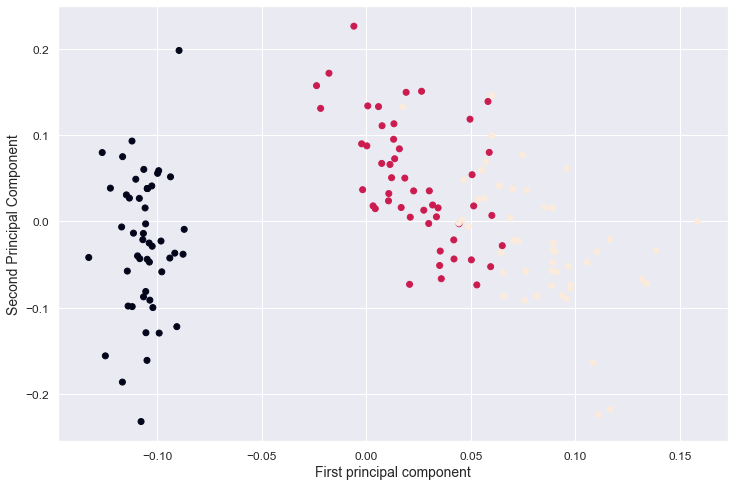

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(principal_components["comp_0"],principal_components["comp_1"], c=y)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

plt.show()

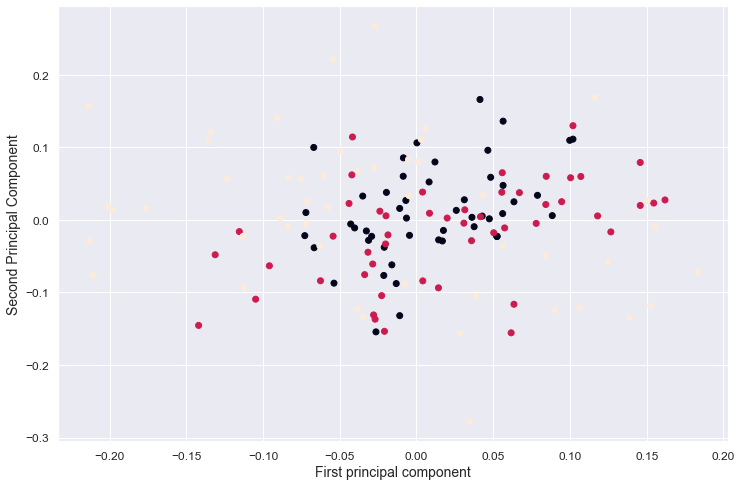

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(principal_components["comp_2"],principal_components["comp_3"], c=y)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

plt.show()

**==========================================================================================================**

In [23]:
principal_components

,comp_0,comp_1,comp_2,comp_3
0,-0.11,-0.04,0.03,0.01
1,-0.10,0.06,0.05,0.06
2,-0.11,0.03,-0.01,0.02
3,-0.11,0.05,-0.02,-0.04
4,-0.11,-0.06,-0.00,-0.02
...,...,...,...,...
145,0.09,-0.03,-0.05,0.22
146,0.07,0.08,0.01,0.13
147,0.07,-0.02,-0.04,0.07
148,0.07,-0.09,-0.20,0.01


In [24]:
df2 = pd.concat([principal_components,y], axis=1)

In [25]:
df2

,comp_0,comp_1,comp_2,comp_3,species
0,-0.11,-0.04,0.03,0.01,0
1,-0.10,0.06,0.05,0.06,0
2,-0.11,0.03,-0.01,0.02,0
3,-0.11,0.05,-0.02,-0.04,0
4,-0.11,-0.06,-0.00,-0.02,0
...,...,...,...,...,...
145,0.09,-0.03,-0.05,0.22,2
146,0.07,0.08,0.01,0.13,2
147,0.07,-0.02,-0.04,0.07,2
148,0.07,-0.09,-0.20,0.01,2


In [26]:
df2.columns

Index(['comp_0', 'comp_1', 'comp_2', 'comp_3', 'species'], dtype='object')

In [27]:
X = df2[['comp_0', 'comp_1', 'comp_2', 'comp_3']]
y = df2[['species']]

In [28]:
X.values, y.values

(array([[-0.10837451, -0.04301984,  0.02593777,  0.0131235 ],
        [-0.09985038,  0.05575477,  0.04833703,  0.05870214],
        [-0.11332336,  0.02709262, -0.01094989,  0.01582626],
        [-0.11027231,  0.04894608, -0.02102795, -0.03771622],
        [-0.11432008, -0.05740194, -0.00455778, -0.02127059],
        [-0.09908999, -0.12918175, -0.00652665,  0.00250191],
        [-0.11704478, -0.00634299, -0.07278661, -0.02166833],
        [-0.10690531, -0.02106433,  0.01756387, -0.01450667],
        [-0.11207942,  0.09316325, -0.03266325, -0.01523963],
        [-0.10474379,  0.03816453,  0.05244405, -0.02269823],
        [-0.1035383 , -0.09107474,  0.0561557 ,  0.00870289],
        [-0.11138167, -0.01349091, -0.02130557, -0.07653093],
        [-0.10643826,  0.06032413,  0.04747849,  0.00149622],
        [-0.1263293 ,  0.07981892, -0.04032219, -0.01104673],
        [-0.10491683, -0.16077901,  0.09986002,  0.10964936],
        [-0.10774871, -0.23159   , -0.00693494,  0.02680386],
        

In [29]:
X = sm.add_constant(X)

In [30]:
mnlogit = sm.MNLogit(y, X)

In [31]:
model = mnlogit.fit(maxiter=100)

         Current function value: 0.039662
         Iterations: 100


In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                species   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      140
Method:                           MLE   Df Model:                            8
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                  0.9639
Time:                        05:44:46   Log-Likelihood:                -5.9493
converged:                      False   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                 7.055e-64
==============================================================================
 species=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7925   1.89e+05   6.78e-05      1.000    -3.7e+05     3.7e+05
comp_0      1016.7162    2.2e+07   4.62e-05      1.000   -4.32e+07    4.32e+07
comp_1       297.7940   8.75e+06    3.4e-05      1.000   -1.72e+07    1.72e+07
comp_2      -167.2334   4.77e+06   -3.5e-05      1.000   -9.36e+06    9.36e+06
comp_3        27.2527   3.19e+06   8.53e-06      1.000   -6.26e+06    6.26e+06
------------------------------------------------------------------------------
 species=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.2929   1.89e+05  -3.86e-05      1.000    -3.7e+05     3.7e+05
comp_0      1376.1757    2.2e+07   6.25e-05      1.000   -4.32e+07    4.32e+07
comp_1       323.3034   8.75e+06   3.69e-05      1.000   -1.72e+07    1.72e+07
comp_2      -223.2727   4.77e+06  -4.68e-05      1.000   -9.36e+06    9.35e+06
comp_3        16.3917   3.19e+06   5.13e-06      1.000   -6.26e+06    6.26e+06
==============================================================================
"""

**==========================================================================================================**